# Filter cells+positions+variants using thresholds

Saving as: 
1) NT pileup format for mgatk, similar to the input
2) Filtered af_by_cell matrix. This may not get used b/c we will call variants with mgatk later, but nice to have
3) Sparse matrices of Depth + allele frequency. These could be used for vireo. 

Create a function to convert between NT pileup and sparse matrices.

### Filter parameters

In [1]:
min_cells=100
min_reads=50
topn=0
het_thresh=0.01
min_het_cells=10
het_count_thresh = 2
bq_thresh=30

#minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30
filt_dir = f"minC{min_cells}_minR{min_reads}_topN{topn}_hetT{het_thresh}_hetC{min_het_cells}_hetCount{het_count_thresh}_bq{bq_thresh}"
filt_dir

'minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30'

In [2]:
import os
import time
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import main
import numpy as np
from glob import glob

Project Directory: /data2/mito_lineage


### Folder variables

In [3]:
indir=join(RESULTS,"mttrace")
num_reads = 200
cellr="True"
in_prefix = f'jan21_2021'
j2 = "J2"
p2 = "P2"

j2_indir = join(indir, in_prefix, j2,"MT",f"cellr_{cellr}")
p2_indir = join(indir, in_prefix, p2,"MT",f"cellr_{cellr}")

concat_j2_dir = join(j2_indir,f"{j2}_{num_reads}")
concat_p2_dir = join(p2_indir,f"{p2}_{num_reads}")


## Run for J2

In [4]:
filter_dir = join(ROOT_DIR, concat_j2_dir, "filters", filt_dir)
filter_files = glob(join(ROOT_DIR, concat_j2_dir, "filters", filt_dir,"*"))
filter_files

['/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30/heatmap.png',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30/J2.C.txt',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30/J2.G.txt',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30/af_by_cell.tsv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30/stats.csv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount2_bq30/af_by_cell.bq.tsv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2

In [7]:
dfs = {}
for i in ["A", "C", "G", "T", "coverage"]:
    dfs[i] = pd.read_csv(join(filter_dir, f"J2.{i}.txt"), header=None)

In [10]:
dfs = pd.concat(dfs)

In [17]:
from src.external.pyvenn import venn

## All the cells are covered in each file :

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


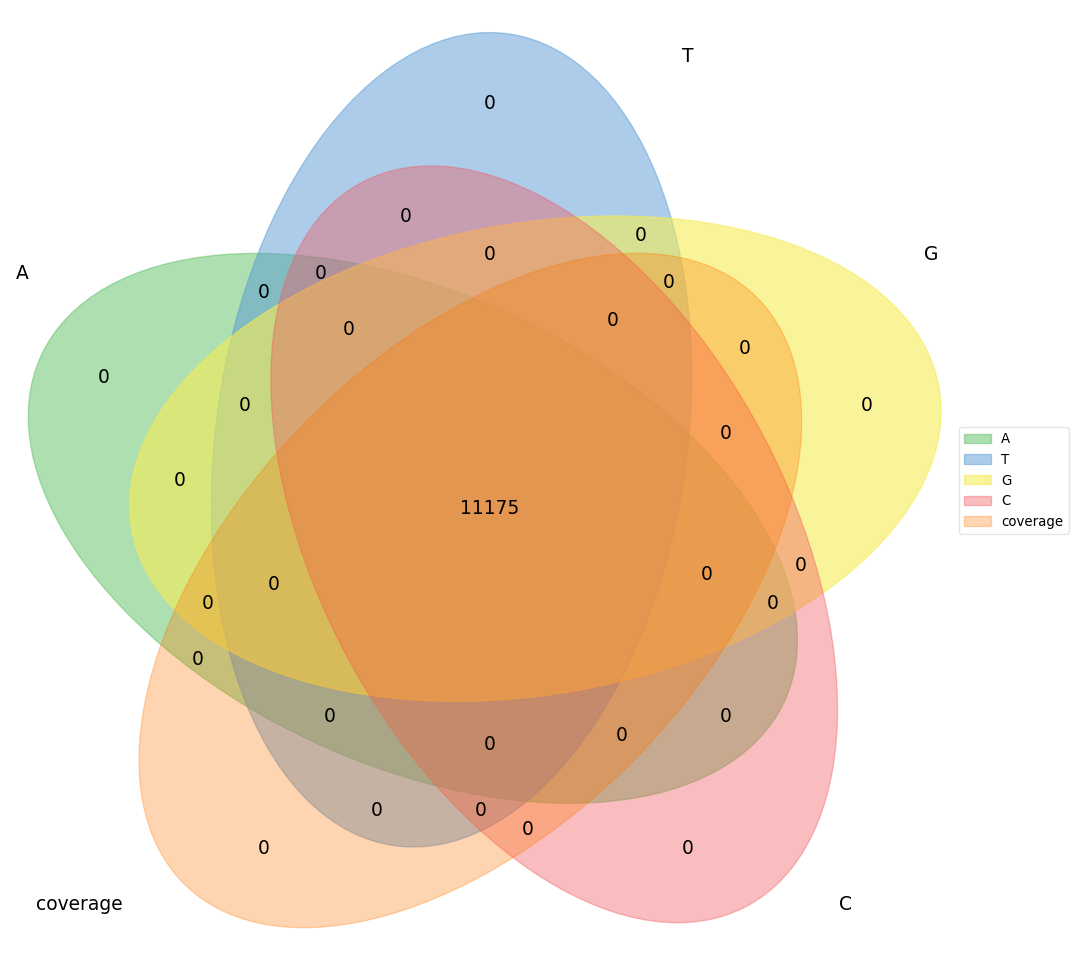

In [18]:
%matplotlib inline

nts = ["A", "T","G", "C", "coverage"]
labels = venn.get_labels([set(dfs.loc[i][1]) for i in nts], fill=['number'])
fig, ax = venn.venn5(labels, names=nts)
fig.show()

## All the positions are covered in coverage :

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


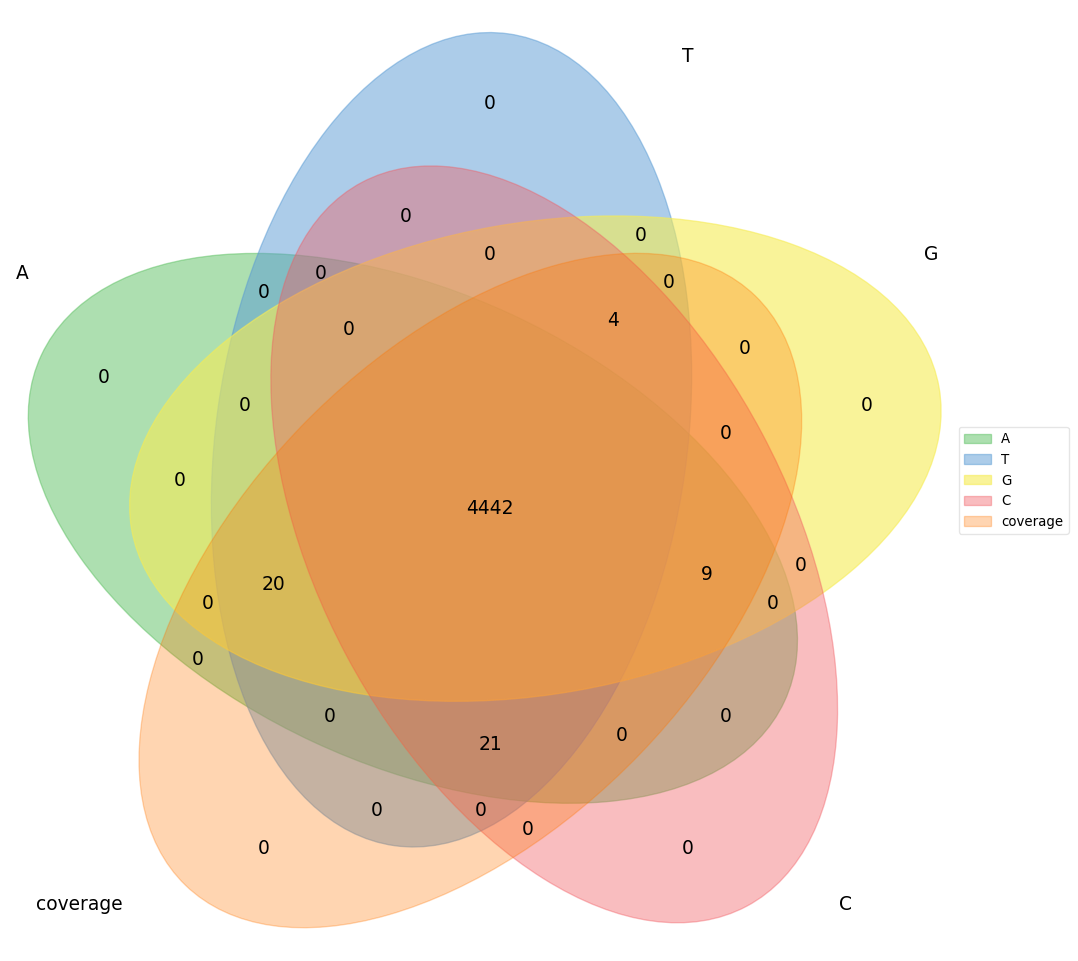

In [20]:
%matplotlib inline

nts = ["A", "T","G", "C", "coverage"]
labels = venn.get_labels([set(dfs.loc[i][0]) for i in nts], fill=['number'])
fig, ax = venn.venn5(labels, names=nts)
fig.show()

## The depth is extremely low. This is per base on average coverage, so this is surprising, especially since we shouldve filtered the low occuring positions

Text(0.5, 1.0, 'Log2 average depth per position for each cell ')

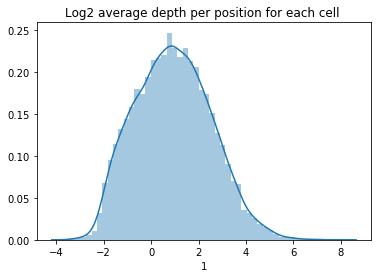

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
depth=pd.read_csv(join(filter_dir, "J2.depthTable.txt") ,sep="\t", header=None)

sns.distplot(np.log2(depth[1]))
plt.title("Log2 average depth per position for each cell ")

## Plot the coverage

In [33]:
cov = dfs.loc["coverage"].pivot(index=0, columns=1, values=2)
cov

1,AAACGAAAGAGCTCCC-1,AAACGAAAGCGATACG-1,AAACGAAAGGCTTCGC-1,AAACGAAAGTACAACA-1,AAACGAACAACGTACT-1,AAACGAACAAGCGGTA-1,AAACGAACACCTGGTG-1,AAACGAACACGATATC-1,AAACGAACACTTACAG-1,AAACGAACATTAAGGA-1,...,TTTGTGTGTGAATACA-1,TTTGTGTGTTTGACCA-1,TTTGTGTTCAAAGTAG-1,TTTGTGTTCCTAGAGT-1,TTTGTGTTCCTTTGCG-1,TTTGTGTTCGAGTTAC-1,TTTGTGTTCGCATAAC-1,TTTGTGTTCGTGGTAT-1,TTTGTGTTCGTTACAG-1,TTTGTGTTCTCCTTGG-1
0,,,,,,,,,,,,,,,,,,,,,
1,23.0,40.0,28.0,32.0,110.0,11.0,73.0,28.0,45.0,13.0,...,69.0,39.0,23.0,22.0,73.0,41.0,13.0,11.0,87.0,28.0
21,57.0,79.0,74.0,51.0,186.0,26.0,103.0,59.0,81.0,30.0,...,119.0,57.0,45.0,34.0,111.0,75.0,29.0,21.0,156.0,53.0
28,56.0,82.0,78.0,45.0,210.0,30.0,111.0,67.0,97.0,31.0,...,135.0,59.0,57.0,37.0,115.0,69.0,32.0,24.0,158.0,53.0
34,60.0,97.0,93.0,60.0,242.0,35.0,121.0,75.0,101.0,32.0,...,157.0,68.0,64.0,50.0,128.0,75.0,37.0,25.0,167.0,51.0
49,74.0,101.0,123.0,59.0,253.0,38.0,100.0,78.0,113.0,47.0,...,170.0,85.0,70.0,59.0,136.0,83.0,37.0,29.0,196.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16542,57.0,65.0,60.0,66.0,206.0,22.0,101.0,53.0,105.0,60.0,...,119.0,64.0,42.0,12.0,124.0,56.0,43.0,18.0,143.0,72.0
16543,57.0,66.0,55.0,61.0,204.0,20.0,101.0,51.0,102.0,56.0,...,115.0,62.0,40.0,13.0,121.0,54.0,42.0,18.0,144.0,72.0
16545,53.0,60.0,52.0,60.0,192.0,20.0,98.0,49.0,96.0,49.0,...,108.0,61.0,40.0,12.0,114.0,54.0,37.0,20.0,136.0,66.0


In [37]:
depth_from_cov = cov.sum(axis=0).sort_values()[::-1]


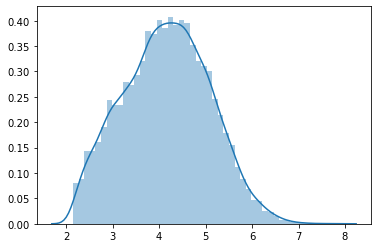

In [39]:
sns.distplot(np.log2(depth_from_cov/16569))

Text(0.5, 1, 'log2 Coverage')

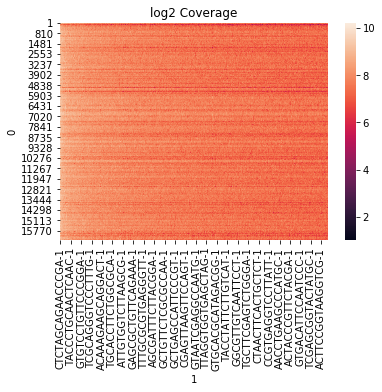

In [53]:
sns.heatmap(np.log2(cov.loc[:, depth_from_cov.index[:1000]]+1))
plt.title("log2 Coverage")